In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
from shutil import copyfile
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('*/score.sc')], ignore_index = True)

(-132.60983178571428, 15.381114891031306)


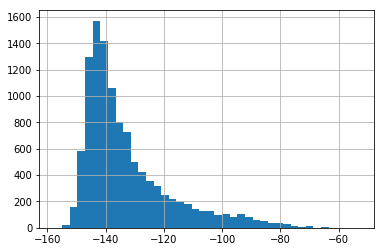

In [3]:
df['hbond_lr_bb'].hist(bins=40)
print(df['hbond_lr_bb'].mean(), df['hbond_lr_bb'].std())

(88.25034875, 165.4254108232722)


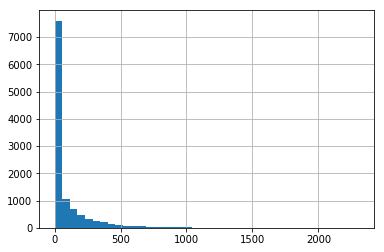

In [4]:
df['vdw'].hist(bins=40)
print(df['vdw'].mean(), df['vdw'].std())

(46.07951910714285, 35.13815240968329)


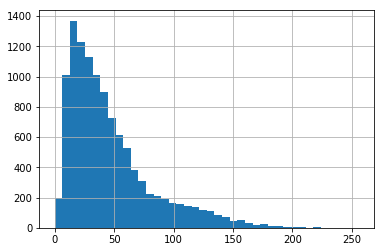

In [5]:
df['omega'].hist(bins=40)
print(df['omega'].mean(), df['omega'].std())

(10.569223392857143, 9.176313587643003)


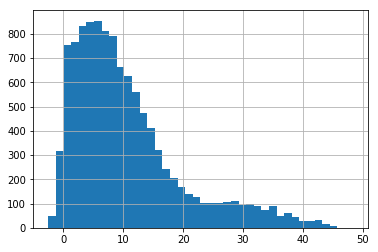

In [6]:
df['cen_rama'].hist(bins=40)
print(df['cen_rama'].mean(), df['cen_rama'].std())

In [11]:
dclash = df.loc[(df['vdw'] < 1.0) & (df['omega'] < 14.0) & (df['cen_rama'] < 2)]
dclash

,SCORE:,total_score,angle_constraint,atom_pair_constraint,cen_rama,cen_total,coordinate_constraint,dihedral_constraint,hbond_lr_bb,hbond_sr_bb,omega,rama,rg,rsigma,ss_pair,sspair,vdw,description
7,SCORE:,8648.368,9443.711,4.624,1.135,-781.049,0.0,0.097,-144.317,-39.716,2.929,1.135,17.208,-252.010,-385.105,-385.105,0.914,input_0008
13,SCORE:,8628.376,9415.655,4.747,-0.368,-767.437,0.0,0.565,-145.443,-38.268,7.702,-0.368,17.055,-250.403,-382.700,-382.700,0.972,input_0014
15,SCORE:,8633.444,9414.361,8.134,0.282,-758.352,0.0,0.042,-142.333,-37.850,9.363,0.282,17.110,-250.877,-385.157,-385.157,0.523,input_0016
29,SCORE:,8595.170,9388.850,5.121,-1.347,-778.348,0.0,0.305,-149.032,-36.563,4.754,-1.347,17.311,-246.272,-387.769,-387.769,0.222,input_0030
32,SCORE:,8621.796,9413.234,4.290,0.749,-775.078,0.0,0.615,-145.578,-39.594,4.939,0.749,17.195,-248.167,-385.699,-385.699,0.836,input_0033
42,SCORE:,8610.899,9409.361,6.671,0.110,-779.622,0.0,0.786,-144.311,-38.870,2.235,0.110,17.406,-249.182,-393.130,-393.130,0.498,input_0043
69,SCORE:,8660.835,9436.142,5.322,0.897,-755.089,0.0,0.249,-144.502,-39.510,10.620,0.897,16.959,-242.171,-382.987,-382.987,0.614,input_0070
83,SCORE:,8673.942,9419.791,9.676,1.887,-715.090,0.0,0.084,-143.164,-35.809,10.567,1.887,17.114,-236.151,-369.973,-369.973,0.815,input_0084
117,SCORE:,8602.168,9398.725,6.777,-0.287,-781.358,0.0,0.276,-146.863,-41.169,7.692,-0.287,17.383,-254.557,-385.637,-385.637,0.184,input_0018
138,SCORE:,8644.261,9432.579,4.466,0.157,-769.912,0.0,0.123,-142.961,-38.651,10.896,0.157,17.282,-252.824,-386.617,-386.617,0.757,input_0039


In [12]:
for folder_id in range(0,111):
    score_file = str(folder_id) +"/"+ "score.sc"
    dsc = pd.read_csv(score_file, sep='\s+', header=1)
    dclashes = dsc.loc[(dsc['vdw'] < 1.0) & (dsc['omega'] < 14.0) & (dsc['cen_rama'] < 2)]
    print dclashes.shape
    for model in dclashes.description:
        source = str(folder_id) + "/" + model + ".pdb"
        target = "best_500/" + str(folder_id)+"_"+ model + ".pdb"
        copyfile(source, target)


(6, 18)
(3, 18)
(5, 18)
(2, 18)
(4, 18)
(8, 18)
(4, 18)
(6, 18)
(1, 18)
(5, 18)
(7, 18)
(5, 18)
(6, 18)
(1, 18)
(2, 18)
(2, 18)
(5, 18)
(4, 18)
(4, 18)
(3, 18)
(5, 18)
(5, 18)
(5, 18)
(5, 18)
(2, 18)
(4, 18)
(5, 18)
(3, 18)
(3, 18)
(5, 18)
(3, 18)
(5, 18)
(4, 18)
(7, 18)
(5, 18)
(3, 18)
(6, 18)
(7, 18)
(5, 18)
(5, 18)
(1, 18)
(7, 18)
(8, 18)
(4, 18)
(3, 18)
(5, 18)
(3, 18)
(8, 18)
(4, 18)
(6, 18)
(4, 18)
(5, 18)
(6, 18)
(3, 18)
(6, 18)
(8, 18)
(2, 18)
(6, 18)
(6, 18)
(5, 18)
(4, 18)
(3, 18)
(4, 18)
(4, 18)
(7, 18)
(6, 18)
(5, 18)
(4, 18)
(3, 18)
(8, 18)
(2, 18)
(4, 18)
(1, 18)
(5, 18)
(6, 18)
(5, 18)
(3, 18)
(6, 18)
(2, 18)
(3, 18)
(5, 18)
(4, 18)
(6, 18)
(3, 18)
(6, 18)
(7, 18)
(6, 18)
(6, 18)
(7, 18)
(7, 18)
(6, 18)
(6, 18)
(5, 18)
(2, 18)
(5, 18)
(2, 18)
(4, 18)
(3, 18)
(4, 18)
(4, 18)
(3, 18)
(4, 18)
(8, 18)
(7, 18)
(1, 18)
(2, 18)
(3, 18)
(2, 18)
(3, 18)
(8, 18)
(3, 18)


In [2]:
df = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('best_500/*_input_*/score.sc')], ignore_index = True)
print(df)

      SCORE:  total_score  aa_composition  angle_constraint  \
0     SCORE:     -602.348             0.0               0.0   
1     SCORE:     -591.466             0.0               0.0   
2     SCORE:     -594.975             0.0               0.0   
3     SCORE:     -598.643             0.0               0.0   
4     SCORE:     -601.131             0.0               0.0   
5     SCORE:     -605.181             0.0               0.0   
6     SCORE:     -608.649             0.0               0.0   
7     SCORE:     -606.244             0.0               0.0   
8     SCORE:     -607.284             0.0               0.0   
9     SCORE:     -594.546             0.0               0.0   
10    SCORE:     -599.641             0.0               0.0   
11    SCORE:       54.003             0.0               0.0   
12    SCORE:       68.708             0.0               0.0   
13    SCORE:       19.586             0.0               0.0   
14    SCORE:       72.949             0.0              

(15.937818326693227, 2.915831180155427)


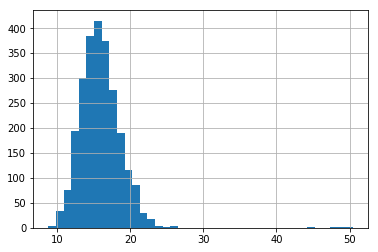

In [3]:
df['omega'].hist(bins=40)
print(df['omega'].mean(), df['omega'].std())

(7.855408366533863, 10.046416812961851)


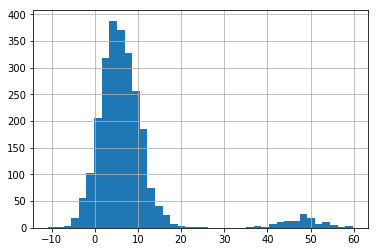

In [4]:
df['rama_prepro'].hist(bins=40)
print(df['rama_prepro'].mean(), df['rama_prepro'].std())

(-133.55688247011952, 2.618713095080069)


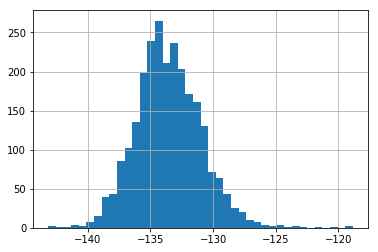

In [5]:
df['hbond_lr_bb'].hist(bins=40)
print(df['hbond_lr_bb'].mean(), df['hbond_lr_bb'].std())

(-566.063964940239, 142.6505760315544)


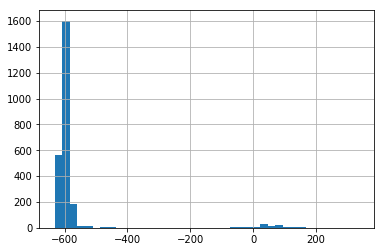

In [6]:
df['total_score'].hist(bins=40)
print(df['total_score'].mean(), df['total_score'].std())

In [11]:
best_round1 = df.loc[(df['total_score'] < -550) & (df['omega'] < 17.0) & (df['rama_prepro'] < 4) & (df['hbond_lr_bb'] < -130)]
best_round1.shape

(597, 26)

In [12]:
#best_round1 = df.loc[(df['total_score'] < -550) & (df['omega'] < 16.0) & (df['rama_prepro'] < -1) & (df['hbond_lr_bb'] < -131)]
#best_round1.shape
for model in best_round1.description:
    folder_id = "_".join(model.split("_")[0:3])
    source = "best_500/" + str(folder_id) + "/" + model + ".pdb"
    target = "round1/" + model + ".pdb"
    copyfile(source, target)

In [2]:
df = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('best_200_AAAGG/*__input_*/score.sc')], ignore_index = True)
print df

     SCORE:  total_score  dslf_fa13   fa_atr   fa_dun  fa_elec  fa_intra_rep  \
0    SCORE:     -398.651        0.0 -597.811   97.587 -246.670         1.262   
1    SCORE:     -388.285        0.0 -592.514  104.944 -245.595         1.373   
2    SCORE:     -392.825        0.0 -582.011   94.813 -261.821         1.168   
3    SCORE:     -401.955        0.0 -582.534   91.896 -245.974         1.156   
4    SCORE:     -399.010        0.0 -599.945  103.746 -255.615         1.337   
5    SCORE:     -413.838        0.0 -600.581   94.060 -247.970         1.260   
6    SCORE:     -412.315        0.0 -607.139  104.933 -251.784         1.302   
7    SCORE:     -427.854        0.0 -615.161   99.664 -256.290         1.365   
8    SCORE:     -403.723        0.0 -598.187   97.434 -257.173         1.240   
9    SCORE:     -407.535        0.0 -605.922  102.364 -255.479         1.308   
10   SCORE:     -390.281        0.0 -590.385   89.749 -256.400         1.257   
11   SCORE:     -396.337        0.0 -567

(14.397738064516128, 4.34814222229521)


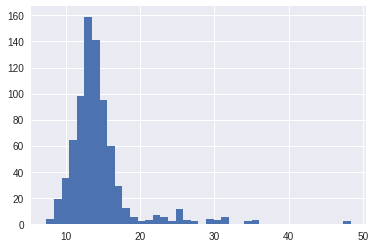

In [3]:
df['omega'].hist(bins=40)
print(df['omega'].mean(), df['omega'].std())

(-4.0910916129032255, 5.4469146066288125)


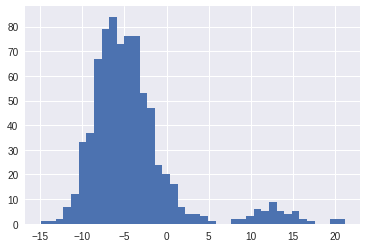

In [4]:
df['rama_prepro'].hist(bins=40)
print(df['rama_prepro'].mean(), df['rama_prepro'].std())

(-86.591006451612898, 2.6741875713242305)


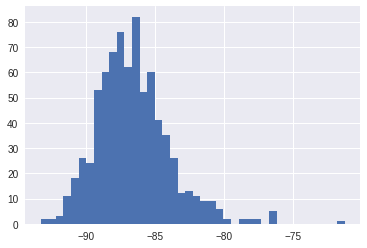

In [5]:
df['hbond_lr_bb'].hist(bins=40)
print(df['hbond_lr_bb'].mean(), df['hbond_lr_bb'].std())

(-335.55036903225806, 216.05220453853102)


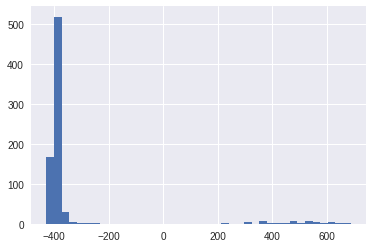

In [6]:
df['total_score'].hist(bins=40)
print(df['total_score'].mean(), df['total_score'].std())

In [11]:
best_round1 = df.loc[(df['total_score'] < -370) & (df['omega'] < 13.5) & (df['rama_prepro'] < -3.6) & (df['hbond_lr_bb'] < -85)]
best_round1.shape

for model in best_round1.description:
    model_id = model.split("_")[:-1]
    folder_id = "network_filter/" + "_".join(model.split("_")[0:4])
    source = "best_200_AAAGG/" + str(folder_id) + "/" + model + ".pdb"
    target = "round1_AAAGG/" + model + ".pdb"
    copyfile(source, target)